# Data Scientist  Nanodegree
## Human Resources Analytics - Capstone Project
Dalal AlWedaah  
August 28th, 2019
____________________________________________________________________________

In [1]:
# Import necessary libs
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



### Load data 

In [2]:
hr_data = pd.read_csv('HR_comma_sep.csv')

In [3]:
hr_data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Preprocessing

In [4]:
hr_data.rename(columns={'sales': 'department'}, inplace = True)

hr_data['salary'] = hr_data['salary'].map({'low':1, 'medium':2, 'high':3})
#hr_data['department'] = hr_data['department'].map({'Sales':1, 'accounting':2, 'hr':3, 'technical':4, 'support':5, 'management':6, 'IT':7, 'product_mng':8, 'marketing':9, 'RandD':10})

### Exploratory Analysis

In [5]:
# Dataset characteristics
print("Number of instances in dataset = {}".format(hr_data.shape[0]))
print("Total number of columns = {}".format(hr_data.shape[1]))
print("\n Total numer of null values:")
print(hr_data.isnull().sum())

Number of instances in dataset = 14999
Total number of columns = 10

 Total numer of null values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


In [6]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                     int64
dtype: object

In [7]:
turnover_rate = hr_data.left.value_counts() / len(hr_data)
turnover_rate


0    0.761917
1    0.238083
Name: left, dtype: float64

In [8]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


### Exploratory Visualization

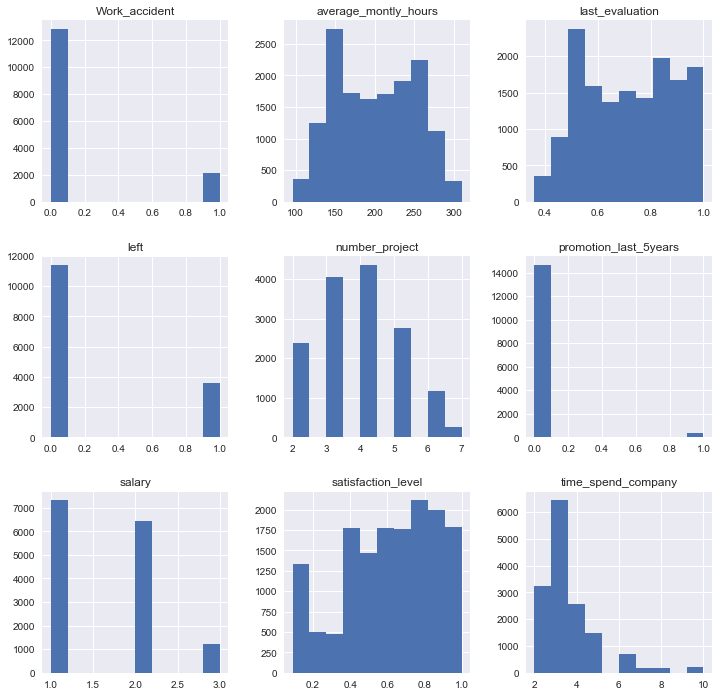

In [9]:
# histograms
histograms = hr_data.hist(figsize=(12, 12))

In [10]:
corr = hr_data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


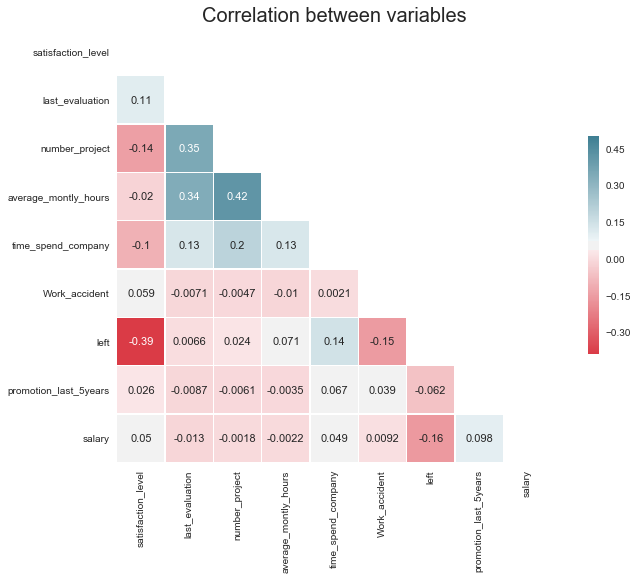

In [11]:
sns.set(style='white')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13,8))
cmap = sns.diverging_palette(10,220, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation between variables', fontsize=20);

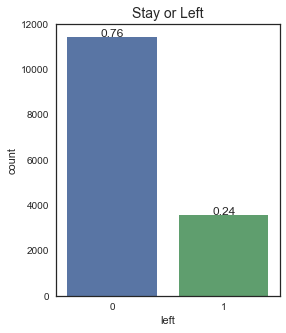

In [12]:
plt.figure(figsize=(4,5))
ax = sns.countplot(hr_data.left)
total = float(len(hr_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Stay or Left', fontsize=14);

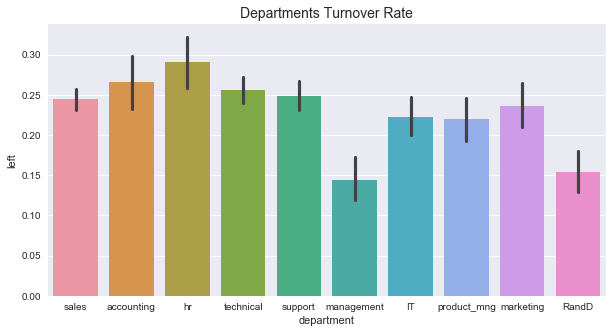

In [13]:


sns.set()
plt.figure(figsize=(10,5))
sns.barplot(x='department', y='left',  data=hr_data)
plt.title('Departments Turnover Rate', fontsize=14);



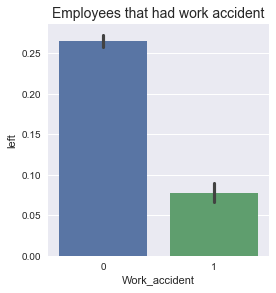

In [14]:


sns.factorplot(x='Work_accident', y='left', kind='bar', data=hr_data)
plt.title('Employees that had work accident', fontsize=14);



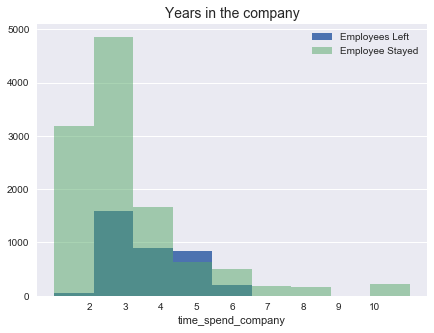

In [15]:
plt.figure(figsize =(7,5))
bins = np.linspace(1.0, 11,10)
plt.hist(hr_data[hr_data['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees Left')
plt.hist(hr_data[hr_data['left']==0]['time_spend_company'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.xlabel('time_spend_company')
plt.title('Years in the company', fontsize=14)
plt.legend(loc='best');

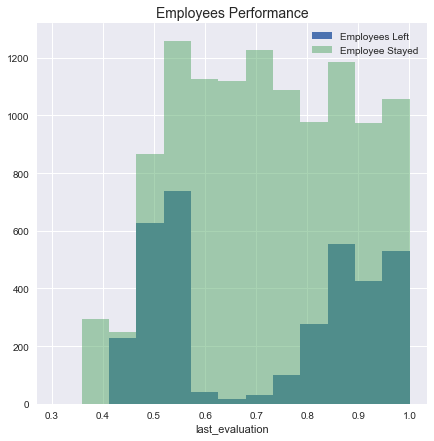

In [16]:


plt.figure(figsize =(7,7))
bins = np.linspace(0.305, 1.0001, 14)
plt.hist(hr_data[hr_data['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(hr_data[hr_data['left']==0]['last_evaluation'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Performance', fontsize=14)
plt.xlabel('last_evaluation')
plt.legend(loc='best');



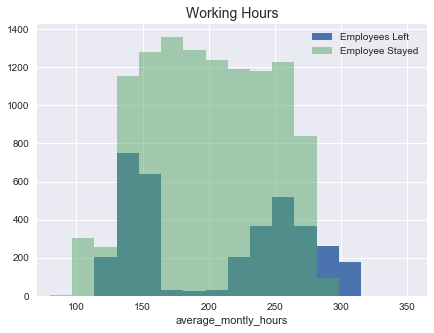

In [17]:
plt.figure(figsize =(7,5))
bins = np.linspace(80,315, 15)
plt.hist(hr_data[hr_data['left']==1]['average_montly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(hr_data[hr_data['left']==0]['average_montly_hours'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Working Hours', fontsize=14)
plt.xlabel('average_montly_hours')
plt.xlim((70,365))
plt.legend(loc='best');

### Data Preprocessing

In [18]:
# Renaming certain columns for better readability
hr_data = hr_data.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
hr_data["department"] = hr_data["department"].astype('category').cat.codes
hr_data["salary"] = hr_data["salary"].astype('category').cat.codes


### Benchmark Model

In [19]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create train and test splits
target_name = 'turnover'
X = hr_data.drop('turnover', axis=1)


y=hr_data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)


kfold = model_selection.KFold(n_splits=10, random_state=123)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.827 (0.011)


### Model Implementation

In [20]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from time import time



# Logistic Regression Model (Benchmark Model)
logis = LogisticRegression(class_weight = "balanced")
start = time()
logis.fit(X_train, y_train)
end = time()
print ("\n\n ---Logistic Model---")
logit_roc_auc_train = roc_auc_score(y_train, logis.predict(X_train))
logit_roc_auc_test = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC on Training set= %2.2f" % logit_roc_auc_train)
print ("Logistic AUC on Testing set= %2.2f" % logit_roc_auc_test)
print ("Training times= %2.2f" % (end - start))
print(classification_report(y_test, logis.predict(X_test)))



# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=6, 
    min_samples_split=2, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
start = time()
rf.fit(X_train, y_train)
end = time()
print ("\n\n ---Random Forest Model---")
rf_roc_auc_train = roc_auc_score(y_train, rf.predict(X_train))
rf_roc_auc_test = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC on Training set= %2.2f" % rf_roc_auc_train)
print ("Random Forest AUC on Testing set= %2.2f" % rf_roc_auc_test)
print ("Training times= %2.2f" % (end - start))
print(classification_report(y_test, rf.predict(X_test)))


# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1)
start = time()
gb.fit(X_train,y_train)
end = time()
print ("\n\n ---Gradient Boosting Model---")
gb_roc_auc_train = roc_auc_score(y_train, gb.predict(X_train))
gb_roc_auc_test = roc_auc_score(y_test, gb.predict(X_test))
print ("Gradient Boosting AUC on Training set= %2.2f" % gb_roc_auc_train)
print ("Gradient Boosting AUC on Testing set== %2.2f" % gb_roc_auc_test)
print ("Training times= %2.2f" % (end - start))
print(classification_report(y_test, gb.predict(X_test)))



 ---Logistic Model---
Logistic AUC on Training set= 0.78
Logistic AUC on Testing set= 0.77
Training times= 0.05
             precision    recall  f1-score   support

          0       0.92      0.75      0.82      1714
          1       0.49      0.79      0.61       536

avg / total       0.82      0.76      0.77      2250



 ---Random Forest Model---
Random Forest AUC on Training set= 0.96
Random Forest AUC on Testing set= 0.96
Training times= 5.01
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1714
          1       0.95      0.93      0.94       536

avg / total       0.97      0.97      0.97      2250



 ---Gradient Boosting Model---
Gradient Boosting AUC on Training set= 0.98
Gradient Boosting AUC on Testing set== 0.96
Training times= 1.84
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1714
          1       0.96      0.94      0.95       536

avg / total       0.98  

### Visualizing Performance

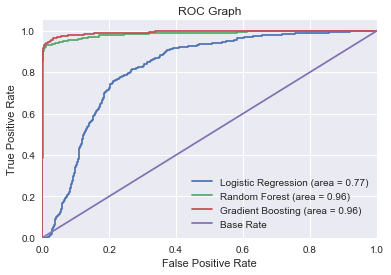

In [21]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc_test)


# Plot Gradient Boosting ROC
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc_test)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' )

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Hyperparameter Tuning

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the best performing regressor
clf = RandomForestClassifier(random_state=123)

# Define the parameter subset
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=20, scoring="roc_auc", cv=5, n_jobs=-1, verbose=2, random_state=123)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.8min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=2)

In [23]:
# Display best params
print("Parameters of best Classifier : {}".format(grid_search.best_params_))

Parameters of best Classifier : {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}


In [24]:
best_model = grid_search.best_estimator_

# Display metrics on training and test set
print("roc_auc  score on Training set = {:.3f}".format(best_model.score(X_train, y_train)))
print("roc_auc score on Testing set = {:.3f}".format(best_model.score(X_test, y_test)))


roc_auc  score on Training set = 1.000
roc_auc score on Testing set = 0.993



** *the tuned model seemed to overfitted then I will choose the untuned model as the best model**

### Feature Analysis

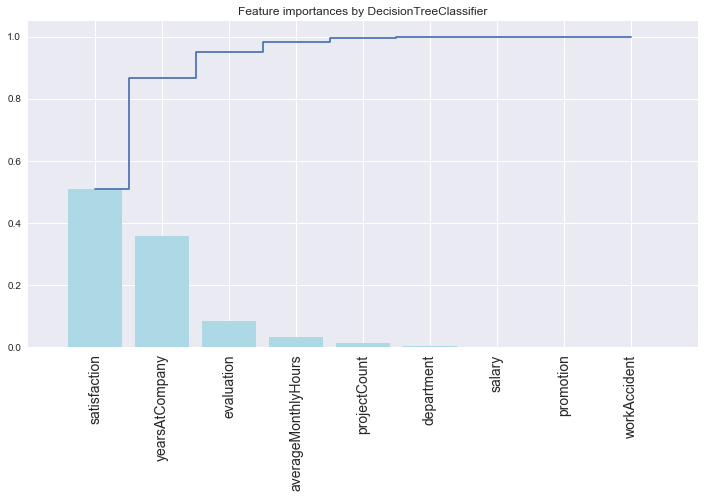

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = hr_data.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

### Conclusion


* Best Algorithm = random forest
     - Random Forest AUC on Testing set= 0.96
* Improvement from benchmark model in terms of percentage of variance explained:-
     - Training data = 9.09%
     - Test data = 11.6%
* No. of features used in final model = 9.
